In [0]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb 2> /dev/null
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub
!apt-get update
!apt-get install -qq cuda gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [313]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [314]:
%%time
!cd /content/drive/'My Drive'/'Colab Notebooks'/ && make && make test

cd /content/drive/'My Drive'/'Colab Notebooks'/
nvcc main.cpp hmm_gpu.cu hmm_cpu.cu hmm_utils.cu -o main -std=c++11
./main
States: 300 | Observations: 30

Likelihood on GPU: 9.3288e-10
Forward, time elapsed on GPU: 0.10876

Likelihood on CPU: 9.3288e-10
Forward, time elapsed on CPU: 0.022234

Viterbi, time elapsed on GPU: 0.007256

Viterbi, time elapsed on CPU: 0.032594

Epoch: 0 | Likelihood: 9.22739e-10
Epoch: 10 | Likelihood: 3.13399e-09
Epoch: 20 | Likelihood: 9.2274e-08
Epoch: 30 | Likelihood: 5.92142e-05
Epoch: 40 | Likelihood: 0.00211297
Epoch: 50 | Likelihood: 0.0139367
Epoch: 60 | Likelihood: 0.048808
Epoch: 70 | Likelihood: 0.130739
Epoch: 80 | Likelihood: 0.164649
Epoch: 90 | Likelihood: 0.365141
Baum-Welch, time elapsed on GPU: 4.71965

Epoch: 0 | Likelihood: 9.49507e-10
Epoch: 10 | Likelihood: 3.05263e-09
Epoch: 20 | Likelihood: 1.28067e-08
Epoch: 30 | Likelihood: 1.45025e-05
Epoch: 40 | Likelihood: 0.000572428
Epoch: 50 | Likelihood: 0.00765324
Epoch: 60 | Likelihood: 0.1

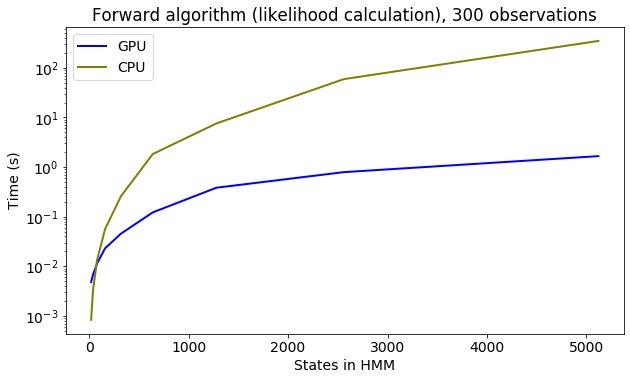

In [315]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import numpy as np

forward_data = np.array([[20, 0.004804, 0.000833], 
                            [40, 0.006874, 0.003393], 
                            [80, 0.011413, 0.013288], 
                            [160, 0.022979, 0.056024], 
                            [320, 0.045529, 0.258548], 
                            [640, 0.122165, 1.83295], 
                            [1280, 0.384137, 7.59362],
                            [2560, 0.791068, 59.2789],
                            [5120, 1.66244, 349.434]])

matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(top=2)
subplt = fig.add_subplot(211)

plt.yscale('log')
plt.xscale('linear')
subplt.plot(forward_data[:, 0], forward_data[:, 1], color='blue', label='GPU', linewidth=2)
subplt.plot(forward_data[:, 0], forward_data[:, 2], color='olive', label='CPU', linewidth=2)
subplt.set_xlabel('States in HMM')
subplt.set_ylabel('Time (s)')

plt.title('Forward algorithm (likelihood calculation), 300 observations')
plt.legend()
plt.show()

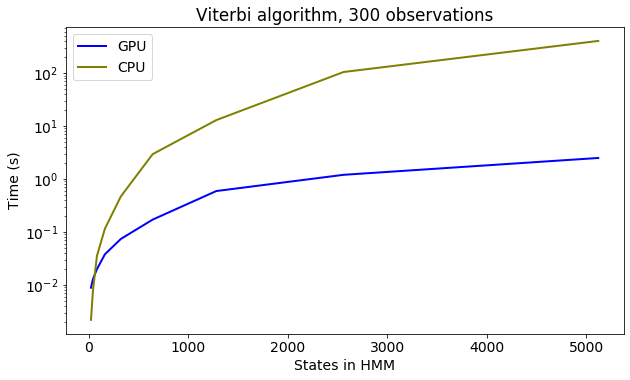

In [317]:
viterbi_data = np.array([[20, 0.008867, 0.002193], 
                            [40, 0.012919, 0.007937], 
                            [80, 0.019889, 0.035461], 
                            [160, 0.037947, 0.115161], 
                            [320, 0.073812, 0.46874], 
                            [640, 0.171304, 2.94781], 
                            [1280, 0.593119, 12.9636], 
                            [2560, 1.20111, 104.899], 
                            [5120, 2.49771, 404.939]])

matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(top=2)
subplt = fig.add_subplot(211)

plt.yscale('log')
plt.xscale('linear')
subplt.plot(viterbi_data[:, 0], viterbi_data[:, 1], color='blue', label='GPU', linewidth=2)
subplt.plot(viterbi_data[:, 0], viterbi_data[:, 2], color='olive', label='CPU', linewidth=2)
subplt.set_xlabel('States in HMM')
subplt.set_ylabel('Time (s)')

plt.title('Viterbi algorithm, 300 observations')
plt.legend()
plt.show()

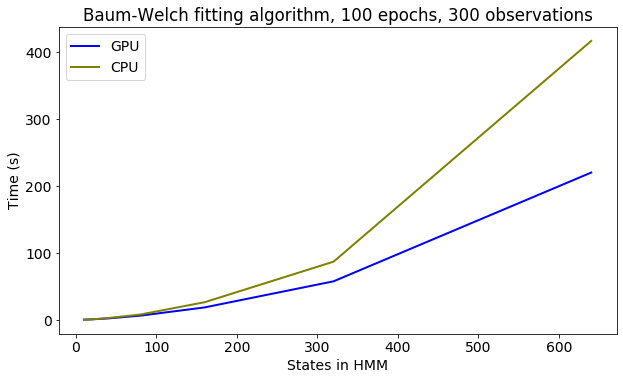

In [316]:
baum_welch_data = np.array([[10, 0.938169, 0.581001], 
                            [20, 1.35996, 1.32231], 
                            [40, 2.73193, 3.30532], 
                            [80, 6.84591, 8.49557], 
                            [160, 19.1443, 26.8989], 
                            [320, 58.002, 87.2675], 
                            [640, 220.069, 416.199]])

matplotlib.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(top=2)
subplt = fig.add_subplot(211)

plt.yscale('linear')
plt.xscale('linear')
subplt.plot(baum_welch_data[:, 0], baum_welch_data[:, 1], color='blue', label='GPU', linewidth=2)
subplt.plot(baum_welch_data[:, 0], baum_welch_data[:, 2], color='olive', label='CPU', linewidth=2)
subplt.set_xlabel('States in HMM')
subplt.set_ylabel('Time (s)')

plt.title('Baum-Welch fitting algorithm, 100 epochs, 300 observations')
plt.legend()
plt.show()